# Create wordcloud with job description data from LinkedIn
### From saulotp's code - https://github.com/saulotp/linkedin-job-description-scrap

### 1. Web Scraping

In [ ]:
# Install required packages
!pip install selenium
!pip install bs4
!pip install pandas
!pip install wordcloud

In [2]:
# Importing libraries
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
# Importing libraries to plot the wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [9]:
# The rest of the code will not work if account is not logged in as there will only be one long page instead
# Variables
# Linkedin ID and PASSWORD
email = "youremail"
password = "yourpassword"

In [5]:
# Write here the job position and local for search
position = "Data Analyst"
location = "Hong Kong SAR"

# formating to linkedin model
position = position.replace(' ', "%20")

In [11]:
# Open browser
driver_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)
# Maximizing browser window to avoid hidden elements
driver.set_window_size(1024, 600)
driver.maximize_window()

# Skipped following steps until jobs webpage
# Opening linkedin website
driver.get('https://www.linkedin.com/login')
# waiting load
time.sleep(2)

# Search for login and password inputs, send credentions
driver.find_element_by_id('username').send_keys(email)
driver.find_element_by_id('password').send_keys(password)
driver.find_element_by_id('password').send_keys(Keys.RETURN)

# Manually enter passcode if two factor authentication is set up, continue after successful login

In [12]:
# Opening jobs webpage
driver.get(
    f"https://www.linkedin.com/jobs/search?keywords={position}&location={location}")
# waiting load
time.sleep(2)

### 2. Collect and Parse the data

In [13]:
# creating a list where the descriptions will be stored
disc_list = []

# each page show us some jobs, sometimes show 25, others 13 or 21, can't be certain
# with this knowledge I created a loop that will check how many jobs the page is listing
# linkedin show us 40 jobs pages, then the line below will repeat 40 times
for i in range(1, 41):
    # click button to change the job list
    driver.find_element_by_xpath(f'//button[@aria-label="Page {i}"]').click()
    # each page show us some jobs, sometimes show 25, others 13 or 21 ¯\_(ツ)_/¯
    jobs_lists = driver.find_element_by_class_name(
        'jobs-search-results__list')  # here we create a list with jobs
    jobs = jobs_lists.find_elements_by_class_name(
        'jobs-search-results__list-item')  # here we select each job to count
    # waiting load
    time.sleep(1)
    # the loop below is for the algorithm to click exactly on the number of jobs that is showing in list
    # in order to avoid errors that will stop the automation
    for job in range(1, len(jobs)+1):
        # job click
        driver.find_element_by_xpath(
            f'/html/body/div[5]/div[3]/div[3]/div[2]/div/section[1]/div/div/ul/li[{job}]/div/div/div[1]/div[2]/div[1]/a').click()
        # waiting load
        time.sleep(1)
        # select job description
        job_desc = driver.find_element_by_class_name('jobs-search__right-rail')
        # get text
        soup = BeautifulSoup(job_desc.get_attribute(
            'outerHTML'), 'html.parser')
        # add text to list
        disc_list.append(soup.text)

In [14]:
# Creating a Dataframe with list
df = pd.DataFrame(disc_list)
df.head()

,0
0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nShare\n\n\n\...
1,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nShare\n\n\n\...
2,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nShare\n\n\n\...
3,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nShare\n\n\n\...
4,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nShare\n\n\n\...


In [27]:
# deleting useless words
df = df.replace(['\n',
                 '^.*?Expect',
                 '^.*?Qualifications',
                 '^.*?Required',
                 '^.*?expected',
                 '^.*?Responsibilities',
                 '^.*?Requirements',
                 '^.*?great',
                 '^.*?Share',
                 '^.*?Show',
                 '^.*?Looking For',
                 '^.*?ll Need',
                 ], '', regex=True)

In [28]:
df.head()

,0
0,more options 2022 Market Data Ana...
1,"Bachelor or above degree in statistics, comput..."
2,)Experience in management consultingExpert in ...
3,Partner with product stakeholders to make data...
4,more options Data Analyst - Digit...


In [33]:
# setup wordcloud
stopwords = set(STOPWORDS)
# selecting useless words
badwords = {'gender', 'experience', 'application', 'Apply', 'salary', 'todos', 'company', 'identity', 'sexual', 'orientation',
            'committed', 'client', 'Share', 'share', 'Show', 'show', 'SAR',
            'world', 'year', 'save', 'information', 'equal', 'oppotunity', 'will', 'Data',
            'work', 'years', 'clients', 'creating',
            'employer', 'working', 'data', 'people', 'one', 'knowledges',
            'software', 'opportunity', 'solution', 'national', 'origin',
            'option', 'science', 'team', 'veteran', 'status', 'etc',
            'Scientist', 'job', 'knowledge', 'toll',
            'time', 'solutions', 'race', 'color',
            'show', 'tool', 'regard', 'without', 'make', 'life',
            'interested', 'proud', 'ability', 'options', 'using', 'product',
            'building', 'skill', 'model', 'religion', 'Share', 'receive', 'consideration',
            'Strong', 'Pay', 'range', 'available', 'part', 'employment', 'qualified', 'applicants', 'gympass',
            'Yes', 'believe', 'moment',
            'new', 'Try', 'Premium', 'employee', 'unavailable',
            'Hong', 'Kong', 'hiring', 'trends', 'recent', 'build', 'career',
            'total', 'free', 'Full',
            'business', 'development', 'Engineering', 'Technology'}
# Adding most shown but irrelevant words back to the list to improve the wordcloud

In [34]:
# deleting the useless words on plot
stopwords.update(badwords)

### 3. Plotting the Graph

In [35]:
# plot parameters
wordcloud = WordCloud(background_color='black',
                      stopwords=stopwords,
                      max_words=100,
                      max_font_size=50,
                      random_state=42).generate("".join(df[0]))

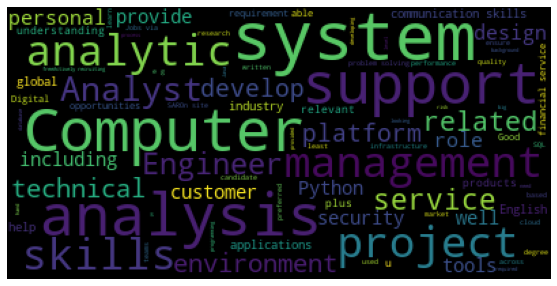

In [36]:
# Plot
print(wordcloud)
plt.figure(figsize=(10, 5))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# exporting our dataframe to a csv file
df.to_csv('wordcloud-job.csv', sep=';')